# 24. Introduction to Gaussian processes

[Data set download](https://s3.amazonaws.com/bebi103.caltech.edu/data/wolfenden_arrhenius.csv)

<hr>

In [1]:
# Colab setup ------------------
import os, sys, subprocess
if "google.colab" in sys.modules:
    cmd = "pip install --upgrade colorcet bebi103 arviz cmdstanpy watermark"
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    import cmdstanpy; cmdstanpy.install_cmdstan()
    data_path = "https://s3.amazonaws.com/bebi103.caltech.edu/data/"
else:
    data_path = "../data/"
# ------------------------------

/Users/bois/opt/anaconda3/lib/python3.9/site-packages/colorcet/__init__.py:74: UserWarning: Trying to register the cmap 'cet_gray' which already exists.
  register_cmap("cet_"+name, cmap=cm[name])
/Users/bois/opt/anaconda3/lib/python3.9/site-packages/colorcet/__init__.py:74: UserWarning: Trying to register the cmap 'cet_gray_r' which already exists.
  register_cmap("cet_"+name, cmap=cm[name])


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
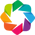

Loading BokehJS ...

In [2]:
import numpy as np
import pandas as pd

import cmdstanpy
import arviz as az

import bebi103

import bokeh.io
bokeh.io.output_notebook()

<hr>

## Predicting using posterior estimates

The following happens a lot in science. We vary variables $\mathbf{x}$ (like time, pH, etc.) and make observations $\mathbf{y}$. We perform a regression using some theoretical function $f(\mathbf{x})$, which describes how we expect $y$ to vary with $\mathbf{x}$. We then can have a pretty good idea what we would measure for some other value of $\mathbf{x}$. By making a few measurements, the regression helps us say things more generally, even for $\mathbf{x}$ values we didn't explicitly use in an experiment.

We have seen this in this class. We perform a regression, getting samples from the posterior distribution. We then sample out of the posterior predictive distribution to get what we might expect for performing an experiment, perhaps with a difference $x$ values. In practice, this is performing a posterior predictive check with some values of $x$ that we hadn't used in a measurement.

This is an example of **parametric inference**, in which we have a specific mathematical model in mind, complete with parameters. But what if we did not have a specific function in mind? Rather, we just would like to be able to *predict* what value of $y$ we might get for some untested $x$ value and we do not really care what the underlying model is. In other words, we just would like to consider a family of functions that do not vary too rapidly or with too large of amplitude. There are an infinity of such functions. This is an example of **nonparametric inference**. In a Bayesian context, nonparametric inference involves consideration of an infinite number of models. We will explore nonparametric inference in the context of **Gaussian processes**.

As we go about this, it will be useful to have a concrete example in mind.

## An example data set

For concreteness, let's consider a specific example, the breakdown of $\alpha$-1-methylglucopyranoside, a key step in the hydrolysis of cellulose. This is featured in a [nice paper by Wolfenden and Snider](https://dx.doi.org/10.1021/ar000058i) about the power of enzymes as catalysts. This example shows that glucoside hydrolysis is incredibly slow in the absence of enzymes. Let's take a quick look at measured rate constants $k$ as a function of temperature.

In [3]:
df = pd.read_csv(os.path.join(data_path, 'wolfenden_arrhenius.csv'))
df['T (K)'] = 1000 / df['1000/T (1/K)']
df['k (1/s)'] = np.exp(df['ln k (1/s)'])

p = bokeh.plotting.figure(
    frame_height=250,
    frame_width=350,
    x_axis_label='T (K)',
    y_axis_label='k (1/s)'
)
p.circle(source=df, x='T (K)', y='k (1/s)')

bokeh.io.show(p)

The chemical rate constant is often well described by the **Arrhenius relation**,

\begin{align}
k = A \mathrm{e}^{-E_a/k_BT},
\end{align}

where $E_a$ is the activation energy that catalysts serve to decrease. For ease of notation, I will define units such that $k_B = 1$, and will convert back to familiar units when needed. So, we can write the Arrhenius rate law as

\begin{align}
k = A \mathrm{e}^{-E_a/T}.
\end{align}

In an experiment, we can vary (and exactly measure) $T$, so there are two parameters, $A$ and $E_a$. A generative model for this might be (where the units of $A$ are in seconds and we again abuse a logarithm to make specification of the prior easier)

\begin{align}
&\log_{10}E_a \sim \text{Normal}(-6, 6),\\[1em]
&E_a = 10^{\log_{10} E_a},\\[1em]
&\log_{10} A \sim \text{Normal}(-6, 6), \\[1em]
&A = 10^{\log_{10} A}, \\[1em]
&\sigma \sim \text{HalfNorm}(0.01), \\[1em]
&\mu_i = A \mathrm{e}^{-E_a/T_i}\;\forall i,\\[1em]
&k_i \sim \text{Norm}(\mu_i, \sigma)\;\forall i.
\end{align}

Just for fun, we can perform parameter estimation for this model. The Stan code is

```stan
data {
  int<lower=1> N;
  real T[N];
  real k[N];

  int<lower=1> N_ppc;
  real T_ppc[N_ppc];
}


parameters {
  real log10_Ea;
  real log10_A;
  real<lower=0> sigma;
}


transformed parameters {
  real Ea = 10^log10_Ea;
  real A = 10^log10_A;

  real mu[N];
  for (i in 1:N) {
    mu[i] = A * exp(-Ea / T[i]);
  } 
}


model {
  sigma ~ normal(0.0, 0.01);
  log10_Ea ~ normal(1.0, 6.0);
  log10_A ~ normal(1.0, 6.0);

  k ~ normal(mu, sigma);
}


generated quantities {
  real k_ppc[N_ppc];
  for (i in 1:N_ppc) {
    k_ppc[i] = normal_rng(A * exp(-Ea / T_ppc[i]), sigma);
  }
}
```

Note that we have chosen a prior on the activation energy to allow for very large values, which is what we might expect for uncatalyzed reactions. Let's perform the inference.

In [4]:
# Generate data dictionary
T = df["T (K)"].values
k = df["k (1/s)"].values
N = len(T)
T_ppc = np.linspace(450, 530, 200)
N_ppc = len(T_ppc)

data = dict(N=N, N_ppc=N_ppc, T=T, T_ppc=T_ppc, k=k)

# Compile and sample
with bebi103.stan.disable_logging():
    sm_parametric = cmdstanpy.CmdStanModel(stan_file="parametric.stan")

    samples = sm_parametric.sample(
        data=data,
        adapt_delta=0.99,
        max_treedepth=15,
        iter_warmup=4000,
        iter_sampling=4000,
    )
    
samples = az.from_cmdstanpy(posterior=samples, posterior_predictive="k_ppc")

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

As usual, we should check the diagnostics. (I actually did this with the default sampling settings, and found that I needed to take more samples and increase `adapt_delta` and the maximum tree depth.)

In [5]:
bebi103.stan.check_all_diagnostics(samples, max_treedepth=15)

Effective sample size looks reasonable for all parameters.

Rhat looks reasonable for all parameters.

0 of 16000 (0.0%) iterations ended with a divergence.

0 of 16000 (0.0%) iterations saturated the maximum tree depth of 15.

E-BFMI indicated no pathological behavior.


0

We're ok on the diagnostics. Let's take a look at posterior predictive checks to see how the model performed.

In [6]:
k_ppc = samples.posterior_predictive['k_ppc'].stack(
    {"sample": ("chain", "draw")}
).transpose("sample", "k_ppc_dim_0")

bokeh.io.show(
    bebi103.viz.predictive_regression(
        k_ppc,
        samples_x=T_ppc,
        data=np.vstack((T, k)).transpose(),
        x_axis_label='T (K)',
        y_axis_label='k (1/sec)',
        x_range=[T_ppc.min(), T_ppc.max()],
    )
)

These look good; the model can generate the data set. Now, let's look at the parameter values. It is better to look at $A$ on a logarithmic scale.

In [7]:
bokeh.io.show(
    bebi103.viz.corner(
        samples,
        parameters=["Ea", "log10_A", "sigma"],
    )
)

We see extremely strong correlation between the activation energy and the pre-exponential factor. We can identify both parameters, but they have broad distributions, varying over almost two orders of magnitude in the case of $A$.

In doing this analysis, we got something important: physically meaningful parameter values. We also got the ability to *predict* what the rate constant would be for a temperature for which we have no measurement. The model affords us that. But what if only this prediction is important to us, and not the physical model? Or maybe we just cannot come up with a physical model because we don't know enough about chemical reactions kinetics to do so. We would nonetheless like to make predictions about rate constants and different temperatures. This is where **Gaussian processes** can be useful, and we will use this example as a data set to explore Gaussian processes.

## Processes and nonparametric Bayesian inference

Remember that Bayes's Theorem applies to any logical conjecture. It even applies to *functions*! So, imagine we have observed data $\mathbf{X}$ and $\mathbf{y}$. I use a capital $\mathbf{X}$ here to allow for multidimensional dependent variables. For example, we might want to study both temperature and pH dependence of a rate constant. In this case, each row of $\mathbf{X}$ is a pH, temperature pair. We define row $i$ of $\mathbf{X}$ to be $\mathbf{x}_i$.

We expect that for each observation, $y_i = f(\mathbf{x}_i) + \epsilon_i$, where $\epsilon_i$ is some measurement error and/or inherent stochasticity and $f(x)$ is an *unknown* function of $\mathbf{x}$. We can still write Bayes's Theorem.

\begin{align}
\pi(f\mid \mathbf{y}, \mathbf{X}) = \frac{\pi(\mathbf{y}, \mathbf{X} \mid f)\,\pi(f)}{\pi(\mathbf{y}, \mathbf{X})}.
\end{align}

To avoid confusion with the symbol $f$ for the unknown functions, we will not use $f$ for the likelihood, nor $g$ for the prior and posterior, instead using $\pi$ for all probabilities and probability densities.

It may seem strange to write a probability of functions, but remember that this is allowed in the Bayesian interpretation of probability. We call a probability distribution over functions a **process**. So, the posterior, $\pi(f\mid \mathbf{y}, \mathbf{X})$, and the prior, $\pi(f)$, are processes.

Since we are primarily interested in predicting new measurements, we want to compute the posterior predictive distribution. Let $\mathbf{x}_*$ be a set of $x$-values for which we want predictions of the corresponding $y$-values, $f(\mathbf{x}_*)$. Then, assuming for a moment that we can compute the posterior, we can write a posterior predictive distribution,

\begin{align}
\pi(f(\mathbf{x}_*) \mid \mathbf{x}_*, \mathbf{y}, \mathbf{X}) = \int \mathrm{d}f\,\pi(f(\mathbf{x}_*)\mid \mathbf{x}_*, f)\, \pi(f\mid \mathbf{y}, \mathbf{X}).
\end{align}


This looks exactly the same as the posterior predictive distribution for parametric regression. Instead of writing a probability distribution over infinitely many parameter values in the parametric setting, we are now writing a process over infinitely many functions.

## Gaussian processes with a finite number of points

How can we treat a probability distribution over functions? We can instead define a probability distribution over the function's *values* at some arbitrary points. So, imagine we get function values at points $\mathbf{X}$, with $N$ total observations. We can define a **joint distribution**, $\pi(f(\mathbf{x}_1), \ldots, f(\mathbf{x}_N))$. We use this probability density as a drop-in replacement for a process.

What distribution should we choose for this joint distribution? We can choose many distributions for this, but we might choose a joint multivariate Normal (a.k.a. Gaussian) distribution. This defines a **Gaussian process**, or GP. To define the joint distribution, then, we need to define the two parameters of a multivariate Gaussian distribution, its mean and covariance. The mean must be defined for an arbitrary point $\mathbf{x}$, and the covariance for an arbitrary *pair* of points $\mathbf{x}, \mathbf{x}'$. Thus, the **mean function**, $m(\mathbf{x})$ and the covariance function, usually referred to as a **kernel function**, $k(\mathbf{x}, \mathbf{x}')$, uniquely define a Gaussian process. We can write a Gaussian process as

\begin{align}
f(\mathbf{x}) \mid \theta_m, \theta_k \sim \text{GP}(m(\mathbf{x} ; \theta_m), k(\mathbf{x}, \mathbf{x}' ; \theta_k)),
\end{align}

where $\theta_m$ and $\theta_k$ are sets of **hyperparameters** that parametrize the mean and kernel functions.

Because in practice we compute $f(\mathbf{x}_*)$ in order to get the a picture of what the nonparametric functions given by a Gaussian process look like (that is, we compute the value of the function at a finite set of points $\mathbf{x}_*$), we can write Bayes's theorem again as

\begin{align}
\pi(f(\mathbf{x}_*)\mid \mathbf{x}_*, \mathbf{y}, \mathbf{X}) = \frac{\pi(\mathbf{y}, \mathbf{X}\mid f(\mathbf{x}_*), \mathbf{x}_*)\,\pi(f(\mathbf{x}_*) \mid \mathbf{x}_*)}{\pi(\mathbf{y}, \mathbf{X})}.
\end{align}

Or, if we want to evaluate $f$ at multidimensional points, $\mathbf{X}_*$,

\begin{align}
\pi(f(\mathbf{X}_*)\mid \mathbf{X}_*, \mathbf{y}, \mathbf{X}) = \frac{\pi(\mathbf{y}, \mathbf{X}\mid f(\mathbf{X}_*), \mathbf{X}_*)\,\pi(f(\mathbf{X}_*) \mid \mathbf{X}_*)}{\pi(\mathbf{y}, \mathbf{X})}.
\end{align}

The values of the nonparametric function, $f(\mathbf{X}_*)$ are often referred to as **latent variables** because they are variables that are not directly observed.

### The mean function and centering and scaling

In a purely nonparametric approach, we almost always take the mean function to be zero; $m(\mathbf{x}) = 0$. We may, however, wish to do a **semi-parametric regression** and introduce an explicit bias via $m(\mathbf{x})$. We often do this when we have, e.g., count data, that we cannot really transform such that the mean is zero.

In general in machine learning applications, and many nonparametric contexts in general, it is good practice to **center and scale** the observed data to improve performance of your algorithms. I will not get into the details of this here (though see [this series of blog posts by Hugo Bowne-Anderson on the topic](https://www.datacamp.com/community/tutorials/preprocessing-in-data-science-part-1-centering-scaling-and-knn), but rather will encourage you to center and scale your data before performing inference with a GP, if you can. Specifically, if $\bar{\mathbf{y}}$ is the arithmetic mean of observations $\mathbf{y}$, and $s_\mathbf{y}$ is the sample standard deviation of $\mathbf{y}$, then you should apply a linear transformation of $\mathbf{y}$ to get a centered and scaled version.

\begin{align}
\mathbf{y}_\mathrm{scaled} = \frac{\mathbf{y} - \bar{\mathbf{y}}}{s_\mathbf{y}}.
\end{align}

You should then work with $\mathbf{y}_\mathrm{scaled}$. You should do this to all $\mathbf{y}$ values. You can then apply the inverse linear transformation to get back your original values.

\begin{align}
\mathbf{y} = s_\mathbf{y} \mathbf{y}_\mathrm{scaled} + \bar{\mathbf{y}}.
\end{align}

Henceforth, we will assume we are working with centered and scaled data such that the mean functions of Gaussian process priors are zero.

### The kernel and covariance matrix

The covariance function, $k(\mathbf{x}, \mathbf{x}')$ is called a **kernel**. It must have certain properties. Remember that it defines the entries of a covariance matrix of a multivariate Normal distribution. Specifically, let's say that $\mathbf{X}$ has $n$ rows. Then, we can define an $n\times n$ matrix, $\mathsf{K}(\mathbf{X}, \mathbf{X}')$ that has entries

\begin{align}
K_{ij} = k(\mathbf{x}_i, \mathbf{x}'_j).
\end{align}

This matrix is a covariance matrix, which is a special case of a **Gram matrix**. Because this is a joint Gaussian distribution, the covariance matrix $\mathsf{K}(\mathbf{X}, \mathbf{X}')$ must be positive definite for *any* $\mathbf{X}$, $\mathbf{X}'$. This puts a restriction on what kernels that are allowed. Some common kernels that result in positive definite covariance matrices are shown below.

\begin{align}
&\text{linear: } k(\mathbf{x}, \mathbf{x}') = \sigma_b^2 + \sum_i \sigma_i^2 x_i\,x_i' \\[1em]
&\text{polynomial: } k(\mathbf{x}, \mathbf{x}') =  (\sigma_b^2 + \sigma_p^2\,\mathbf{x}^\mathsf{T} \cdot \mathbf{x}')^d, \;\;d = \{1, 2, 3, \ldots\}\\[1em]
&\text{squared exponential (SE): } k(\mathbf{x}, \mathbf{x}') = \alpha^2\,\exp\left[-\frac{\left\Vert\mathbf{x} - \mathbf{x}'\right\Vert_2^2}{2\rho^2}\right] \\[1em]
&\text{Matérn: }k(\mathbf{x}, \mathbf{x}') = \alpha^2\,\frac{2^{1-\nu}\,\beta^\nu}{\Gamma(\nu)}\,K_\nu\left(\beta\right), \text{ where } \beta = \left(\frac{2\nu\left\Vert\mathbf{x} - \mathbf{x}'\right\Vert_2^2}{\rho^2}\right)^{\frac{1}{2}}\\[1em]
&\text{Matérn ($\nu=5/2$): } k(\mathbf{x}, \mathbf{x}') = \alpha^2\left(1 + \left(\frac{5\left\Vert\mathbf{x} - \mathbf{x}'\right\Vert_2^2}{\rho^2}\right)^{\frac{1}{2}} + \frac{5 \left\Vert\mathbf{x} - \mathbf{x}'\right\Vert_2^2}{3\rho^2}\right)  \exp\left[-\left(\frac{5\left\Vert\mathbf{x} - \mathbf{x}'\right\Vert_2^2}{\rho^2}\right)^{\frac{1}{2}}\right],\\[1em]
&\text{periodic: } k(\mathbf{x}, \mathbf{x}') = \alpha^2\,\exp\left[-\frac{2}{\rho^2}\,\sin^2\left(\frac{\pi}{T}\,\sqrt{\Vert\mathbf{x} - \mathbf{x}'\Vert_2^2}\right)\right].
\end{align}

where

\begin{align}
\left\Vert\mathbf{x} - \mathbf{x}'\right\Vert_2^2 = (\mathbf{x} - \mathbf{x}')^\mathsf{T}\cdot(\mathbf{x} - \mathbf{x}')
\end{align}

is the 2-norm, and $K_\nu$ is a modified Bessel function of the second kind. For the periodic kernel, which is used to model functions that vary periodically, $T$ is the period. I have given the special case of a Matérn kernel with $\nu = 5/2$, since that is widely used. 

The squared exponential (SE) kernel is probably the most widely used, and it is also known as the **exponentiated quadratic kernel** or the **radial basis function kernel**, and it is built in to Stan (where it is referred to as the exponentiated quadratic kernel). In the spirit of principled modeling, in which we go from simple models to more complex models, it is worth noting that the SE kernel is the $\nu \to \infty$ limit of the Matérn kernel. For finite $\nu$, functions realized from the Matérn kernal will only have derivatives defined up to $\nu$. So, the parameter $\nu$ is a smoothness parameter. For $\nu < 1$, the first derivatives are not defined, and the functions drawn out of a GP with a Matérn kernel with $\nu < 1$ are therefore very rough.

So, how do we interpret all of this? For ease of parsing the statements that follow, it may be useful to have the mathematical functions for the SE kernel in mind. If $\mathbf{x}$ and $\mathbf{x}'$ are close to each other, the kernel returns a large value. The value returned by the kernel falls off as $\mathbf{x}$ and $\mathbf{x}'$ grow farther apart. So, the covariance between $\mathbf{x}$ and $\mathbf{x}'$ is large if they are close, and small if they are farther apart. A large covariance means that $f(\mathbf{x})$ and $f(\mathbf{x}')$ should be close to one another, and a small covariance means that they are unrelated.

Finally, we note that each of the kernels have parameters. In all of the kernels listed above, there are the **marginal standard deviation** $\alpha$ and the **length scale** $\rho$. The Matérn kernel also has the smoothness parameter $\nu$ and the periodic kernel also has the period $T$. Other kernels not listed above may have other parameters. So, in this sense, this "nonparametric" model has some tunable parameters. Specifically, these parameters say something about how the possible functions $f(\mathbf{x})$ might behave. In the examples above, the covariance is modulated by $\rho$. If $\rho$ is large, then $\mathbf{x}$ and $\mathbf{x}'$ do not have to be so close together to influence each other. This means that the function is not so rapidly varying. So, $\rho$ sets a length scale over which the function $f(\mathbf{x})$ varies. Similarly, $\alpha$ sets the amplitude of the variations. The larger $\alpha$ is, the more $f(\mathbf{x})$ will vary in the vertical direction. The parameters $\theta_k$ of the kernel are called **hyperparameters**, because their inclusion results in a hierarchical Bayesian model. Specifically, we can write Bayes's theorem for a model with a GP prior for $f$ with zero mean function as

\begin{align}
\pi(f, \theta_k \mid \mathbf{y}, \mathbf{X}) = \frac{\pi(\mathbf{y}, \mathbf{X} \mid f)\,\pi(f \mid \theta_k)\,\pi(\theta_k)}{\pi(\mathbf{y}, \mathbf{X})},
\end{align}

where

\begin{align}
f \mid \theta_k \sim \text{GP}(0, k(\mathbf{x}, \mathbf{x}'; \theta_k)).
\end{align}

In summary, the kernel specifies key features of the functions we are using to describe our data. It sets lengths scales for typical variation in the horizontal and vertical directions.

## Sampling out of a Gaussian process prior

We would like to draw samples out of a Gaussian process (in this case with an SE kernel). As an example, let's sample the function $f$ at discrete points out of the Gaussian process

\begin{align}
f \mid \alpha, \rho \sim \text{GP}(\mathbf{0}, k_\mathrm{SE}(\mathbf{x}, \mathbf{x}'; \alpha, \rho)).
\end{align}

Remember that we can represent the prior $\pi(f\mid \alpha, \rho)$ as a multivariate Normal distribution over a set of finite points. For ease, let's consider a one-dimensional dependent variable, so $\mathbf{x} = x$. Say we want to evaluate $f(x)$ at a set of positions $\mathbf{x}_*$. Then the latent variables are distributed as

\begin{align}
f(\mathbf{x}_*) \mid \alpha, \rho \sim \text{MultiNorm}(\mathbf{0}, \mathsf{K}(\mathbf{x}_*, \mathbf{x}_*)).
\end{align}

To sample out of a Gaussian process, we compute the matrix $\mathsf{K}(\mathbf{x}_*, \mathbf{x}_*)$ for given values of $\alpha$ and $\rho$, and then we sample out of this multivariate Normal distribution. I will demonstrate how this is done in both Numpy and Stan.

### Sampling out of a GP prior using Stan

Code to generate samples out of a GP prior using Stan is shown below. I will first display the code and then comment on its contents.

```stan
data {
  // Data points
  int<lower=1> Nstar;
  real xstar[Nstar];

  // Fixed marginal deviance and length scale
  real alpha;
  real rho;
}


transformed data {
  // Covariance matrix
  matrix[Nstar, Nstar] cov = cov_exp_quad(xstar, alpha, rho) 
      + diag_matrix(rep_vector(1e-8, Nstar));

  // Better to use Cholesky decomposition
  matrix[Nstar, Nstar] L = cholesky_decompose(cov);
}


generated quantities {
  // Draw from multivariate normal parametrized with Cholesky decomposition
  vector[Nstar] f = multi_normal_cholesky_rng(rep_vector(0.0, Nstar), L);
}
```

For this Stan code, we are fixing $\alpha$ and $\rho$. In a prior predictive check for a GP model, we would draw $\alpha$ and $\rho$ from their respective hyperpriors, but for this demonstration of sampling out of a GP prior, we will fix them.

In setting up the covariance matrix based on the SE (exponentiated quadratic in Stan-speak) kernel, we can use Stan's built-in `cov_exp_quad()` function. When we build the matrix, we add a small number to the diagonal purely for numerical stability. (Note that in Stan, `rep_vector()` makes a vector with repeated values, in this case `1e-8`.) Next, because it is generally more stable to work with Cholesky decompositions, we compute the Cholesky decomposition `L` of the covariance matrix. Finally, in the `generated quantities` block, we make our draws out of a multivariate Normal centered on zero (remember, we are considering centered and scaled data).

Let's take a couple samples out of the prior and plot the results.

In [8]:
# Parameters for GP prior
Nstar = 250
xstar = np.linspace(-5, 5, Nstar)
alpha = 1.0
rho = 1.0
data = dict(Nstar=Nstar, xstar=xstar, alpha=alpha, rho=rho)

# Compile and sample!
with bebi103.stan.disable_logging():
    sm_prior = cmdstanpy.CmdStanModel(stan_file="gp_prior_fixed_rho_alpha.stan")

    samples = sm_prior.sample(
        data=data,
        iter_sampling=1,
        fixed_param=True
    )
    
samples = az.from_cmdstanpy(posterior=samples, prior=samples, prior_predictive="f")

chain 1 |          | 00:00 Status

Let's plot the result of our sample.

In [9]:
# Plot the result
p = bokeh.plotting.figure(
    frame_height=250,
    frame_width=450,
    x_axis_label="x",
    y_axis_label="f(x)",
    x_range=[-5, 5],
)

p.circle(
    xstar, samples.prior_predictive["f"].values.flatten(), legend_label="α = 1, ρ = 1"
)

bokeh.io.show(p)

I have plotted the function as points to emphasize that we are evaluating the function $f(x)$ at discrete points. Note that the function varies over a length scale of approximately 1 and the amplitude is also approximately 1. We can make the function vary more rapidly by tuning $\rho$ down.

In [10]:
data["rho"] = 0.5

with bebi103.stan.disable_logging():
    samples = sm_prior.sample(data=data, iter_sampling=1, fixed_param=True)

samples = az.from_cmdstanpy(prior=samples, prior_predictive="f")

p.circle(
    xstar,
    samples.prior_predictive["f"].values.flatten(),
    color="orange",
    legend_label="α = 1, ρ = 0.5",
)

bokeh.io.show(p)

chain 1 |          | 00:00 Status

So, different hyperparameter values yield different kinds of functions.

### Sampling out of a GP prior using Numpy

At the heart of being able to sample out of a GP prior (and indeed all sampling with GP-based models) is the ability to compute the covariance matrix from for a given kernel and $x$-points. In Stan, only covariance matrices computed using SE kernels are built-in; you can always code up your own function for Stan to use to build covariance matrices for whatever kernel you please. Conveniently, the `bebi103.gp` module has functions to compute the covariance matrices for all of the kernels listed above. To demonstrate sampling out of a GP prior with Numpy, let's use the Matérn kernel with $\nu = 3/2$. The resulting functions are only once differentiable and will therefore be much rougher than what we got with the SE kernel.

In [11]:
# Again use rho = 1
rho = 1.0

# Make covariance matrix
K = bebi103.gp.cov_matern(xstar, alpha=alpha, rho=rho, nu=1.5)

# Sample out of multivariate normal
rg = np.random.default_rng()
f = rg.multivariate_normal(np.zeros_like(xstar), K)

# Add the result to plot
p.circle(
    xstar, f, color="tomato", legend_label="α = 1, ρ = 1, Matérn",
)

bokeh.io.show(p)

Since it is convenient to sample using Numpy, let's make a **spaghetti plot**, which is a good way to visualize the kind of functions you will get by sampling out of a GP prior. We will again use an SE kernel with $\alpha = \rho = 1$.

In [12]:
# Make covariance matrix
K = bebi103.gp.cov_exp_quad(xstar, alpha=1.0, rho=1.0)

# Sample out of multivariate normal
f = [rg.multivariate_normal(np.zeros_like(xstar), K) for _ in range(100)]

# Make plot
p = bokeh.plotting.figure(
    frame_height=250,
    frame_width=450,
    x_axis_label="x",
    y_axis_label="f(x)",
    x_range=[-5, 5],
)
p.multi_line([xstar for _ in range(100)], f, line_width=0.5)

bokeh.io.show(p)

## Composing kernels

We may take any of the above kernels and compose them by multiplying or adding them together. For example, say we think our function is locally periodic, but may nonetheless vary over time. We might compose a kernel that is the product of a periodic and SE kernel.

In [13]:
def mult_kern(x1, x2, alpha, rho_SE, rho_per, T):
    """Kernel formed from multiplying periodic and SE kernels """
    per = bebi103.gp.periodic_kernel(x1, x2, 1.0, rho_per, T)
    se = bebi103.gp.se_kernel(x1, x2, alpha, rho_SE)
    
    return se * per

We can use this kernel to build a covariance matrix and draw a sample.

In [14]:
params = dict(alpha=1, rho_SE=3, rho_per=1, T=2)
K = bebi103.gp.cov_from_kernel(xstar, xstar, mult_kern, **params)

f = rg.multivariate_normal(np.zeros_like(xstar), K)

# Make plot
p = bokeh.plotting.figure(
    frame_height=250,
    frame_width=450,
    x_axis_label="x",
    y_axis_label="f(x)",
    x_range=[-5, 5],
)
p.line(xstar, f, line_width=2)

bokeh.io.show(p)

Similarly, we can add kernels together. Say we have a periodic function, but it may increase over time. We can get a kernel that captures this behavior by adding a linear and a periodic kernel.

In [15]:
def add_kern(x1, x2, sigma_b, sigma, alpha, rho, T):
    """Kernel formed from adding linear and SE kernels """
    per = bebi103.gp.periodic_kernel(x1, x2, alpha, rho, T)
    linear = bebi103.gp.linear_kernel(x1, x2, sigma_b, sigma)
    
    return linear + per


params = dict(sigma_b=0, sigma=1, alpha=1, rho=1, T=2)
K = bebi103.gp.cov_from_kernel(xstar, xstar, add_kern, **params)

f = rg.multivariate_normal(np.zeros_like(xstar), K)

# Make plot
p = bokeh.plotting.figure(
    frame_height=250,
    frame_width=450,
    x_axis_label="x",
    y_axis_label="f(x)",
    x_range=[-5, 5],
)
p.line(xstar, f, line_width=2)

bokeh.io.show(p)

## Inference with GPs

Gaussian processes can be used as priors in many models. For example, imagine we are measuring the number of gene transcripts in cells by RNA FISH. We assume the expression is not bursty and well-described by a Poisson distribution parametrized by rate parameter $\lambda$. But we do this experiment for various concentrations $\mathbf{c} = \{c_1, c_2, \ldots\}$ of IPTG, which can affect gene expression levels. We may not know how it affects those levels, so we can model $\lambda$ using a Gaussian process with a SE kernel. Our statistical model is then

\begin{align}
&\ln \lambda(\mathbf{c}) \mid \alpha, \rho \sim\text{GP}(0, k_\mathrm{SE}(c, c'; \alpha, \rho)), \\[1em]
&n_i \sim \text{Pois}(\lambda(c_i)) \;\forall i.
\end{align}

Of course, we do need to specify hyperpriors for $\alpha$ and $\rho$ to complete the model. Note that the mean function here is not zero, since we cannot center and scale count data the same way we can continuous data.

In practice, we consider a finite set of points, so we could construct a covariance matrix $\mathsf{K}(\mathbf{c}, \mathbf{c})$ from the kernel. The entries of $\mathsf{K}$ are 

\begin{align}
K_{ij} = k_\mathrm{SE}(c_i, c_j ; \alpha, \rho).
\end{align}

We then could specify our model as

\begin{align}
&\alpha \sim \text{appropriate hyperprior}\\[1em]
&\rho \sim \text{appropriate hyperprior}\\[1em]
&\ln \lambda(\mathbf{c}) \mid \alpha, \rho \sim \text{MultiNormal}(\mathbf{0}, \mathsf{K}) \\[1em]
&n_i \sim \text{Pois}(\lambda(c_i)) \;\forall i.
\end{align}

We will discuss inference with this model in a subsequent lesson on GPs in practice. 

Now, we will consider the special case where we have a Normal likelihood with a GP prior. In this case, we can make significant analytical progress that greatly eases the analysis.

## Normal likelihoods with Gaussian process priors

While GPs priors can be used for arbitrary likelihoods, such as the Poisson likelihood we used above, Normal likelihoods are widely encountered and have some special (and *very* convenient) properties. Specifically, we expect our observation $y$ to follow $y = f(\mathbf{x})$, with some Normally distributed, possibly heteroscedastic error $\boldsymbol{\sigma}$, i.e.,

\begin{align}
y_i \sim \text{Norm}(f(\mathbf{x}_i), \sigma_i) \;\;\forall i.
\end{align}

I will not prove the very convenient properties of this likelihood here, but will state them:

1. For a given set of hyperparameters, a GP prior is conjugate to a Normal likelihood. This means that the posterior is known analytically.
2. The nonparametric function $f(\mathbf{x})$ may be marginalized out. The resulting inference then only involves the hyperparameters of the kernel.

In our demonstrations, we will use an arbitrary kernel, $k(\mathbf{x}, \mathbf{x}';\theta_k)$, since the results we will show are independent of choice of kernel (provided of course that it is positive definite). The complete model is then (without yet specifying priors for the hyperparameters)

\begin{align}
&\theta_k \sim \text{to be defined}, \\[1em]
&\boldsymbol{\sigma} \sim \text{to be defined},\\[1em]
&f \sim \text{GP}(\mathbf{0}, k(\mathbf{x}, \mathbf{x}';\theta_k)),\\[1em]
&y_i \sim \text{Norm}(f(\mathbf{x}_i), \sigma_i) \;\;\forall i.
\end{align}

Because of the conjugacy, the posterior is also a GP,

\begin{align}
f(\mathbf{x}) \mid \mathbf{y}, \mathbf{X} \sim \text{GP}(m(\mathbf{x}), k(\mathbf{x}, \mathbf{x}'; \theta_k) + \sigma_\mathbf{x}^2\,\delta_{\mathbf{x}, \mathbf{x}'}),
\end{align}

with

\begin{align}
\delta_{\mathbf{x},\mathbf{x}'} = \left\{\begin{array}{lll}1 && \mathbf{x} = \mathbf{x}'\\
0 && \mathbf{x} \ne \mathbf{x}',\end{array}\right.
\end{align}

and $\sigma_\mathbf{x}^2$ is defined as the variance in the Normal likelihood at point $\mathbf{x}$. The posterior kernel is given by the prior kernel plus the homoscedastic variance. (In the heteroscedastic case, the respective variance is added to each point $\mathbf{x}$ where the function $f(\mathbf{x})$ is evaluated.) We have defined a posterior mean function $m(\mathbf{x})$, which depends on the measured quantities $\mathbf{y}$. We will show the analytical expression for $m(\mathbf{x})$ evaluated at specific points in terms of the covariance matrix derived from the kernel momentarily in the next section. Note that a GP prior is *only* conjugate to a Normal likelihood and not to other likelihoods.

But wait, there's more! Through some mathematical grunge, we may marginalize away $f$ out of this model (again, this is a special case of a Normal likelihood; we cannot do this in general). Skipping the derivation, the resulting model is

\begin{align}
&\theta_k \sim \text{to be defined}, \\[1em]
&\boldsymbol{\sigma} \sim \text{to be defined},\\[1em]
&\mathbf{y} \sim \text{MultiNorm}(\mathbf{0}, \mathsf{K}_\mathbf{y}),
\end{align} 

where we have defined

\begin{align}
\mathsf{K}_\mathbf{y} \equiv \mathsf{K}(\mathbf{X}, \mathbf{X}) + \mathrm{diag}(\boldsymbol{\sigma}^2),
\end{align}

where $\mathrm{diag}(\boldsymbol{\sigma})$ is a diagonal covariance matrix constructed from the array of $\sigma$ values.

### The posterior predictive distribution of function values

If we specify priors for the hyperparameters $\theta_k$ and for $\sigma$, we have a fully specified model. Because we can conveniently marginalize out $f$, we only need to focus on $\theta_k$ and $\boldsymbol{\sigma}$ as parameters to infer. In the next lesson, we will learn how to find $\theta_k$ and $\sigma$ by finding the MAP and (better) how to draw samples of them using MCMC with Stan. For now, we will focus on understanding the posterior distribution for *particular* values of $\theta_k$ and $\boldsymbol{\sigma}$. 

Going from the posterior samples of the parameters to the posterior predictive distribution is kind of tricky because the values of the function $f$ at unmeasured positions $\mathbf{X}_*$, which we shall denote for notational convenience as $\mathbf{f}_* = f(\mathbf{X}_*)$, depend on the observed values $\mathbf{y}$ and the positions $\mathbf{X}$ at which $\mathbf{y}$ were measured. We wish to compute the posterior predictive distribution of function values, $\mathbf{f}_* \mid \mathbf{X}_*, \mathbf{X}, \mathbf{y}$. We can take advantage of some properties of multivariate Normal distributions to do it.

To start, we can specify a *joint* distribution of the posterior of the observed points, $\mathbf{y} = f(\mathbf{X})$ and the desired set of function evaluations, $\mathbf{f}_* = f(\mathbf{X}_*)$. That is, the joint distribution $\mathbf{y}, \mathbf{f}_* \mid \mathbf{X}_*, \mathbf{X}$. We can do this because we know the posterior is a Gaussian process. The joint distribution is again a multivariate Gaussian,

\begin{align}
\begin{pmatrix}
\mathbf{y}\\
\mathbf{f}_*
\end{pmatrix} \sim
\text{MultiNorm}\left( \mathbf{0},
\begin{pmatrix}
\mathsf{K}_\mathbf{y} & \mathsf{K}_* \\[0.5em]
\mathsf{K}_*^\mathsf{T} & \mathsf{K}_{**}
\end{pmatrix}
\right).
\end{align}

For further notational simplicity, we have defined

\begin{align}
&\mathsf{K}_* = \mathsf{K}(\mathbf{X}, \mathbf{X}_*) \\[1em]
&\mathsf{K}_{**} = \mathsf{K}(\mathbf{X}_*, \mathbf{X}_*).
\end{align}

It is a property of Gaussian matrices (which may be derived with lots of grunge) that we can get the conditional distribution (the posterior predictive distribution) from the joint distribution. Using this result (again, not derived here), we can write the posterior predictive distribution as

\begin{align}
\mathbf{f}_* \mid \mathbf{X}_*, \mathbf{X}, \mathbf{y} \sim
\text{MultiNorm}(\mathbf{m}_*, \mathsf{\Sigma}_*),
\end{align}

where

\begin{align}
&\mathbf{m}_* = \mathsf{K}_*^\mathsf{T} \cdot \mathsf{K}_\mathbf{y}^{-1} \cdot \mathbf{y},\\
&\mathsf{\Sigma}_* = \mathsf{K}_{**} - \mathsf{K}_*^\mathsf{T} \cdot \mathsf{K}_\mathbf{y}^{-1} \cdot \mathsf{K}_*.
\end{align}

The vector $\mathbf{m}_*$ gives the mean value of $\mathbf{f}_* \equiv f(\mathbf{X}_*)$. The diagonal entries of $\mathsf{\Sigma}_*$ give the variance, and therefore the uncertainty, in $\mathbf{y}_*$. Computing $\mathbf{m}_*$ and $\mathsf{\Sigma}_*$ (or at least its diagonal entries) gives us our predictions for a given set of hyperparameters.

### Computing the parameters of the posterior predictive distribution

At the center the calculation of $\mathbf{m}_*$ is inverting the matrix $\mathsf{K}_\mathbf{y}$. More specifically, we need to compute $\mathsf{K}_\mathbf{y}^{-1}\mathbf{y}$, which is the solution $\boldsymbol{\xi}$ to

\begin{align}
\mathsf{K}_\mathbf{y} \cdot \boldsymbol{\xi} = \mathbf{y}.
\end{align}

Because $\mathsf{K}_\mathbf{y}$ is symmetric and positive definite by construction, it has a **Cholesky decomposition**, $\mathsf{L}$, such that

\begin{align}
\mathsf{K}_\mathbf{y} = \mathsf{L}\cdot\mathsf{L}^\mathsf{T}.
\end{align}

The matrix $\mathsf{L}$ is lower triangular. Importantly, it can be stably computed in order $n^3$ operations (for an $n\times n$ $\mathsf{K}_\mathbf{y}$). Substituting in $\mathsf{K}_\mathbf{y}$'s Cholesky decomposition,

\begin{align}
\mathsf{L}\cdot\mathsf{L}^\mathsf{T} \cdot \boldsymbol{\xi} = \mathbf{y}.
\end{align}

Let $\mathbf{z} = \mathsf{L}^\mathsf{T} \cdot \boldsymbol{\xi}$. Then we can solve for $\mathbf{z}$ by solving

\begin{align}
\mathsf{L}\cdot \mathbf{z} = \mathbf{y}.
\end{align}

This is a triangular system and is easily solved. Given $\mathbf{z}$, we then solve for $\boldsymbol{\xi}$ by solving another triangular system

\begin{align}
\mathsf{L}^\mathsf{T}\cdot \boldsymbol{\xi} = \mathbf{z}.
\end{align}

Note that $\mathsf{L}^\mathsf{T}$ is an upper triangular matrix. Stan has built-in solvers for *lower* triangular matrices, so we can convert this to a lower triangular system by taking the transpose of both sides.

\begin{align}
\left(\mathsf{L}^\mathsf{T}\cdot \boldsymbol{\xi}\right)^\mathsf{T} = \boldsymbol{\xi}^\mathsf{T} \mathsf{L} = \mathbf{z}^\mathsf{T}.
\end{align}

So, we never directly invert the $\mathsf{K}_\mathbf{y}$ matrix. Given that we can compute $\boldsymbol{\xi}$, we then directly compute $\mathbf{m}_* = \mathsf{K}_*^\mathsf{T}\cdot \boldsymbol{\xi}$.

Now, to compute the covariance matrix $\mathsf{\Sigma}_*$, we also need to compute $\mathsf{\Xi} = \mathsf{K}_\mathbf{y}^{-1}\cdot \mathsf{K}_*$. This is accomplished again by Cholesky decomposition.

\begin{align}
& \text{solve } \mathsf{L}\cdot \mathsf{Z} = \mathsf{K}_*, \\[1em]
& \text{solve } \mathsf{\Xi}^\mathsf{T} \cdot \mathsf{L}  = \mathsf{Z}.
\end{align}

### Plotting an analytical posterior

Following the above prescription, we can compute the posterior mean $\mathbf{m}^*$ and the posterior covariance $\mathsf{\Sigma}_*$, from which we can plot our nonparametric function.

Using the specific example of the rate constant versus temperature data, we can use a GP prior with a SE kernel. Our model, leaving the priors on the homoscedastic error $\sigma$ and the kernel hyperparameters is

\begin{align}
&\alpha \sim \text{to be specified} \\[1em]
&\rho \sim \text{to be specified} \\[1em]
&\sigma \sim \text{to be specified} \\[1em]
&\mathbf{k}_\mathrm{scaled} \sim \text{GP}(\mathbf{0}, k_\mathrm{SE}(\mathbf{T}_\mathrm{scaled}, \mathbf{T}'_\mathrm{scaled};\alpha, \rho) + \delta_{\mathbf{T}_\mathrm{scaled}, \mathbf{T}'_\mathrm{scaled}}\sigma^2).
\end{align}

We have already marginalized out $\mathbf{f}(\mathbf{x})$. We can then directly go forward to give the posterior *for a particular choice of* $\alpha$, $\rho$, *and* $\sigma$. We will choose $\alpha = \rho = \sigma = 1$ for this illustration. This is a reasonable choice because centering and scaling aims to bring the variation in the data toward unity.

We typically plot it as the mean function with a shaded region containing 95% of the probability mass. To get this 95% credible region, we directly use the diagonal terms of $\mathsf{\Sigma}$.

To start, we center and scale the temperature and rate constants.

In [16]:
# Center and scale
k_scaled = (k - k.mean()) / k.std()
T_scaled = (T - T.mean()) / T.std()

Next, we need to determine for which values of the temperature we want to evaluate our nonparametric function. This will be the $\mathbf{x}_*$.

In [17]:
# Sample at 250 points
Nstar = 250

# Set up xstar
T_range = T_scaled.max() - T_scaled.min()
xstar = np.linspace(
    T_scaled.min() - 0.05 * T_range, T_scaled.max() + 0.05 * T_range, Nstar
)

Now comes the involved part of the calculation. For a given set of hyperparameters and $\sigma$, we compute the posterior mean function $\mathbf{m}_*$ and covariance matrix $\mathsf{\Sigma}_*$ using the linear algebra manipulations above. This is conveniently included in the `bebi103.gp.posterior_mean_cov()` function. It takes as parameters the (centered and scaled) x- and y- values of the measured data, the data points $\mathbf{X}_*$ that we want the values of the nonparametric function, $\sigma$, a kernel (default is the SE kernel) and the hyperparameters of the kernel.

In [18]:
mstar, Sigmastar = bebi103.gp.posterior_mean_cov(
    T_scaled, k_scaled, xstar, sigma=1.0, rho=1.0, alpha=1.0
)

Now that we have $\mathbf{m}_*$ and $\mathsf{\Sigma}_*$, we can compute the upper and lower bounds of the credible interval. Because the posterior is a Gaussian process, we know that we can compute the 95% credible region from the diagonal terms of the covariance matrix $\mathsf{\Sigma}_*$.

In [19]:
# Bound of credible interval
high = mstar + 1.96 * np.sqrt(np.diag(Sigmastar))
low = mstar - 1.96 * np.sqrt(np.diag(Sigmastar))

Now, we just have to uncenter and unscale everything and we can make a plot!

In [20]:
# Uncenter/scale
Tstar = T.std() * xstar + T.mean()
kstar = k.std() * mstar + k.mean()
low = k.std() * low + k.mean()
high = k.std() * high + k.mean()

p = bokeh.plotting.figure(
    frame_height=250, frame_width=350, x_axis_label="T (K)", y_axis_label="k (1/s)"
)
p.line(Tstar, kstar, line_width=2, color="orange")
p = bebi103.viz.fill_between(
    Tstar,
    high,
    Tstar,
    low,
    show_line=False,
    patch_kwargs=dict(color="orange", alpha=0.3),
    p=p,
)
p.circle(source=df, x="T (K)", y="k (1/s)")

bokeh.io.show(p)

It is important to remember that the line in the plot is the most probable function *for the given choice of hyperparameters and* $\sigma$. The envelope is *not* posterior predictive of data sets. Rather in encompasses the exent of 95% of the nonparametric functions $f(T)$. If you wanted a posterior predictive plot, you would have to sample out of the posterior to generate *data*.

Nonetheless, this plot is clear enough to show that this fit does not quite hold muster. It tends to dampen out the variation in the data in favor of a flatter curve. Furthermore, the credible region seems unreasonably wide for these data. Maybe this was not the best choice of hyperparameters. In the next lesson, we will learn how to better choose, or more specifically sample, hyperparameters.

## Conclusions

In this lesson, we have introduced Gaussian processes and demonstrated the useful simplifications when a GP prior is used with a Normal likelihood. Even for these convenient models, we are still left to infer the hyperparameters. Inference for GP priors with non-Normal likelihoods adds extra challenges because we do not have the benefit of conjugacy and cannot marginalize away the function values. We will address these practical issues in the next lesson.

In [21]:
bebi103.stan.clean_cmdstan()

## Computing environment

In [22]:
%load_ext watermark
%watermark -v -p numpy,pandas,cmdstanpy,arviz,bokeh,bebi103,jupyterlab
print("cmdstan   :", bebi103.stan.cmdstan_version())

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

numpy     : 1.20.3
pandas    : 1.3.5
cmdstanpy : 1.0.0
arviz     : 0.11.4
bokeh     : 2.3.3
bebi103   : 0.1.11
jupyterlab: 3.2.1

cmdstan   : 2.28.2
